In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/ankit/Downloads/archive/retail_sales_dataset.csv")

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Gender'] = df['Gender'].astype('category')

In [9]:
df['Product Category'] = df['Product Category'].astype('category')

In [10]:
print(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [11]:
Q1 = df['Price per Unit'].quantile(0.25)
Q3 = df['Price per Unit'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price per Unit'] < lower_bound) | (df['Price per Unit'] > upper_bound)]

print(outliers)

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


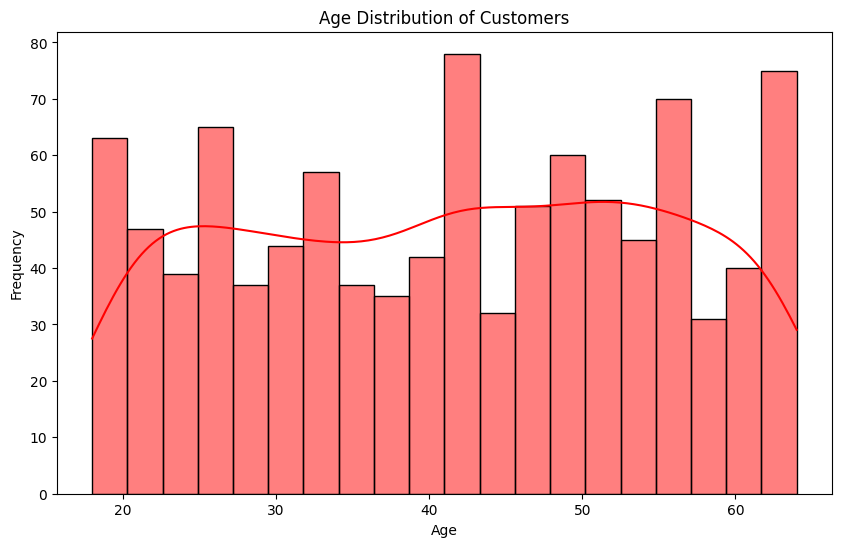

In [22]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20,color="red", kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

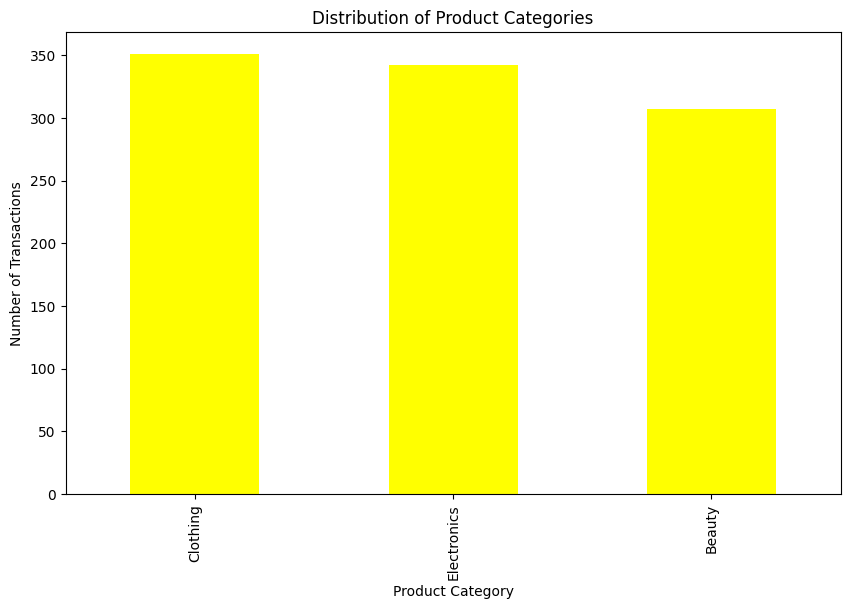

In [23]:
#Product Category Distribution
plt.figure(figsize=(10, 6))
df['Product Category'].value_counts().plot(kind='bar', color='yellow')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.show()

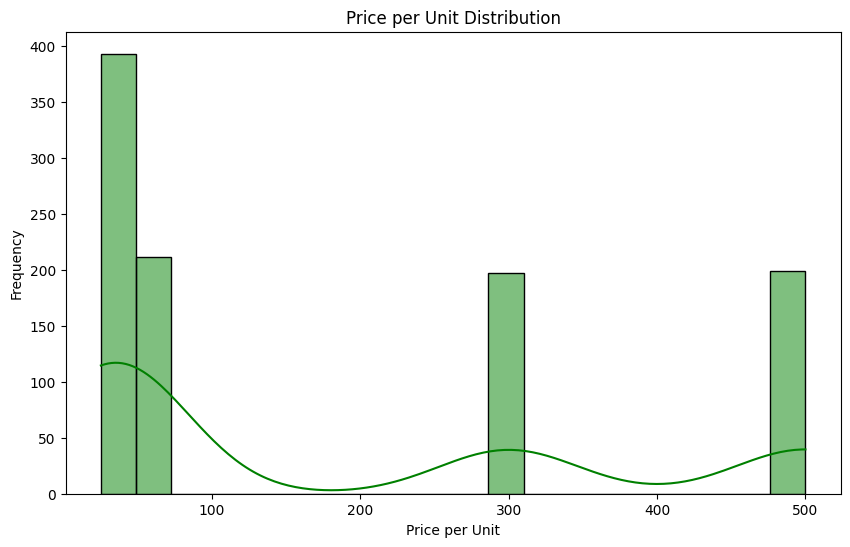

In [20]:
# Price per Unit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], bins=20, kde=True, color='green')
plt.title('Price per Unit Distribution')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

In [24]:
df.to_csv("cleaned.csv", index=False)